In [1]:
import numpy as np
from scipy import special
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
def f(x):
    return .5*x + 3.

def problem1(filename="anscombe.npy"):
    df = np.load(filename)
    x1 = df[:,0]
    y1 = df[:,1]
    x2 = df[:,2]
    y2 = df[:,3]
    x3 = df[:,4]
    y3 = df[:,5]
    x4 = df[:,6]
    y4 = df[:,7]
    
    dom = np.linspace(0,20,50)
    
    plt.subplot(221)
    plt.plot(x1,y1,'o')
    plt.plot(dom, f(dom))
    
    plt.subplot(222)
    plt.plot(x2,y2,'o')
    plt.plot(dom, f(dom))
    
    plt.subplot(223)
    plt.plot(x3,y3,'o')
    plt.plot(dom, f(dom))
    
    plt.subplot(224)
    plt.plot(x4,y4,'o')
    plt.plot(dom, f(dom))
    
    plt.show()

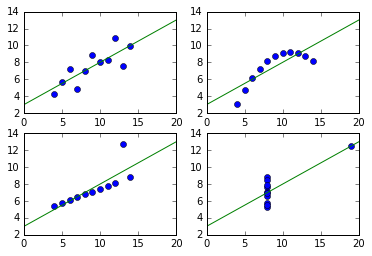

In [3]:
problem1()

The first group of data is a fairly randomly distributed set of lines, and the linear regression fits it. The second one should be a quadratic form. The third set is mostly linear but has a big outlier. The last one is weird because one x value has a lot of y values associated.

In [4]:
def f2(n,v,x):
    return (special.binom(n,v) * (x**v) * ((1.-x)**(n-v)))

In [5]:
def problem2():
    dom = np.linspace(0,1,100)
    for n in xrange(4):
        for v in xrange(n+1):
            cell = 4*n + v + 1
            plt.subplot(4,4,cell)
            plt.plot(dom,f2(n,v,dom),lw=2)
            plt.axis([0,1,0,1.1])
            plt.tick_params(which="both", top="off", right="off")
            plt.title(r"$B_{}_{}$".format(str(v)+",",str(n)))
            if cell < 13:
                plt.tick_params(labelbottom="off")
            if cell % 4 != 1:
                plt.tick_params(labelleft="off")
    plt.tight_layout()
    plt.show()

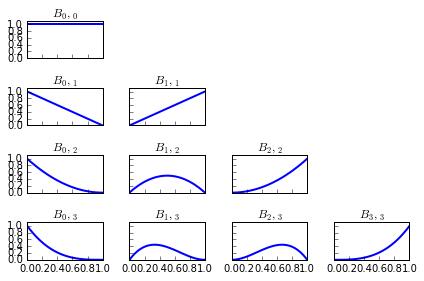

In [6]:
problem2()

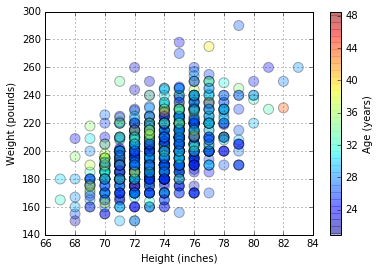

In [7]:
def problem3(filename='MLB.npy'):
    df = np.load(filename)
    height = df[:,0]
    weight = df[:,1]
    age = df[:,2]
    plt.scatter(height, weight, c=age, s=100, alpha=.314)
    cbar = plt.colorbar()
    cbar.set_label("Age (years)")
    plt.grid()
    plt.xlabel("Height (inches)")
    plt.ylabel("Weight (pounds)")
    plt.show()
problem3()

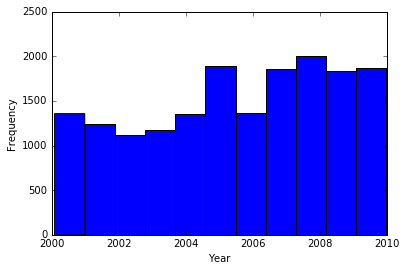

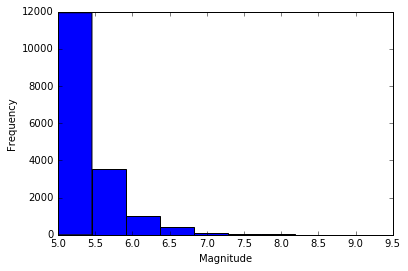

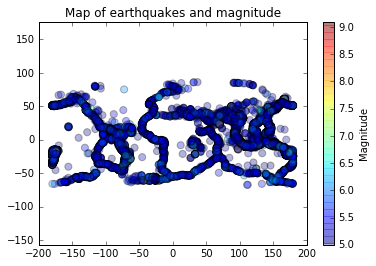

In [8]:
def problem4(filename = 'earthquakes.npy'):
    year, magnitude, longitude, latitude = np.load(filename).T
    
    plt.hist(year, bins=11)
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plt.show()
    
    plt.hist(magnitude, bins = 9)
    plt.xlabel("Magnitude")
    plt.ylabel("Frequency")
    plt.show()
    
    plt.scatter(longitude, latitude, c=magnitude, s=50, alpha = .3)
    cbar = plt.colorbar()
    cbar.set_label("Magnitude")
    plt.axis("equal")
    plt.title("Map of earthquakes and magnitude")
    plt.show()
    
problem4()

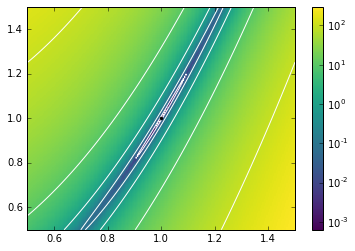

In [9]:
def problem5():
    x=np.linspace(.5,1.5,200)
    X,Y = np.meshgrid(x,x.copy())
    Z=(1.-X)**2 + 100*(Y-X**2)**2
    
    plt.contour(X,Y,Z, colors='white', norm=LogNorm())
    plt.pcolormesh(X,Y,Z, cmap='viridis', norm=LogNorm())
    plt.colorbar()
    
    plt.plot(1,1,'k.')
    
    plt.show()
    
problem5()

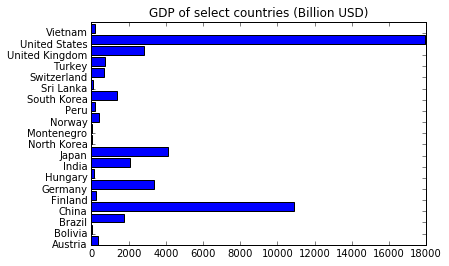

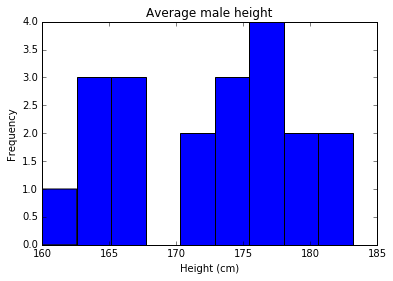

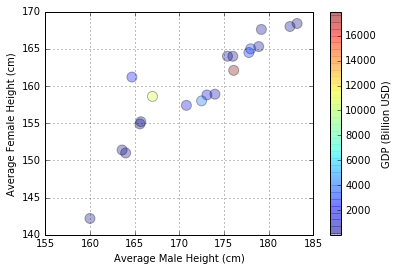

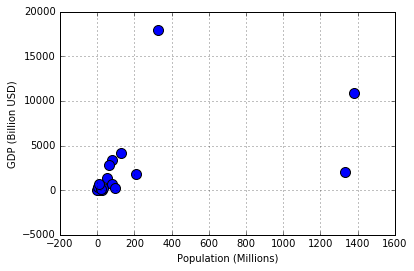

In [10]:
def problem6(filename="countries.npy"):
    countries = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]
    pop, gdp, mheight, fheight = np.load(filename).T
    positions=np.arange(len(countries))
    
    plt.barh(positions, gdp)
    plt.title("GDP of select countries (Billion USD)")
    plt.yticks(positions, countries)
    plt.show()
    
    plt.hist(mheight, bins = 9)
    plt.xlabel("Height (cm)")
    plt.ylabel("Frequency")
    plt.title("Average male height")
    plt.show()    
    
    plt.scatter(mheight, fheight, c=gdp, s=100, alpha=.314)
    cbar = plt.colorbar()
    cbar.set_label("GDP (Billion USD)")
    plt.grid()
    plt.xlabel("Average Male Height (cm)")
    plt.ylabel("Average Female Height (cm)")
    plt.show() 
    
    plt.scatter(pop, gdp, s=100)
    plt.grid()
    plt.xlabel("Population (Millions)")
    plt.ylabel("GDP (Billion USD)")
    plt.show()     
    
problem6()

The US has the biggest GDP, then China. Height is somewhat uniformly distributed. Average male height is tightly correlated with avg female height, but neither relates to GDP. GDP and population may be correlated but the data is inconclusive.